# 단순 선형 회귀분석

▣ 문제

13명의 아버지와 이들의 아들의 키(단위 : cm)를 측정한 자료가 다음과 같다. 단, 사람의 키는 정규분포를 따른다고 가정한다. 아버지의 키를 X, 아들의 키를 Y라 할 때, 단순 선형 회귀분석을 구하시오.

* 아버지:168,160,170,158,176,161,180,183,180,167,179,171,166
* 아들 : 179,169,180,160,178,170,183,187,179,172,181,173,165

In [ ]:
### library
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [ ]:
# 자료 입력
x = [168,160,170,158,176,161,180,183,180,167,179,171,166]
y = [179,169,180,160,178,170,183,187,179,172,181,173,165]
df = pd.DataFrame({"x":x, "y":y})
df

,x,y
0,168,179
1,160,169
2,170,180
3,158,160
4,176,178
5,161,170
6,180,183
7,183,187
8,180,179
9,167,172


In [ ]:
# 변수별 자료 요약
df.describe()

,x,y
count,13.000000,13.000000
mean,170.692308,175.076923
std,8.340510,7.686151
min,158.000000,160.000000
25%,166.000000,170.000000
50%,170.000000,178.000000
75%,179.000000,180.000000
max,183.000000,187.000000


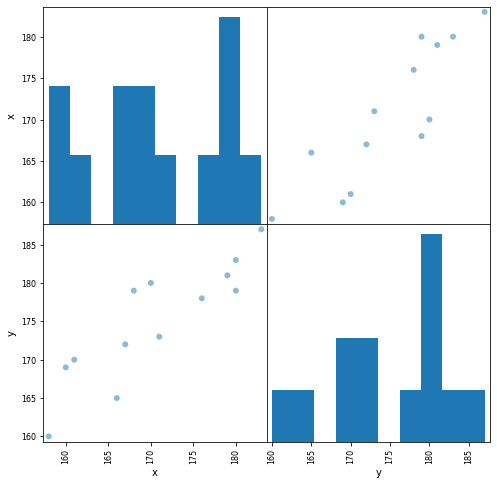

In [ ]:
# 산점도 행렬
p = pd.plotting.scatter_matrix(df, figsize=(8,8), marker='o')

In [ ]:
### 단순 선형 회귀분석
# Regression: y ~ x
reg_simp = ols('y ~ x', data=df).fit()
reg_simp.summary()

C:\Users\choye\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     35.12
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.92e-05
Time:                        11:16:58   Log-Likelihood:                -35.121
No. Observations:                  13   AIC:                             74.24
Df Residuals:                      11   BIC:                             75.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8090     23.187      1.631      0.131     -13.225      88.843
x              0.8042      0.136      5.927      0.000       0.506       1.103
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.394
Skew:                           0.013   Prob(JB):                        0.821
Kurtosis:                       2.148   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

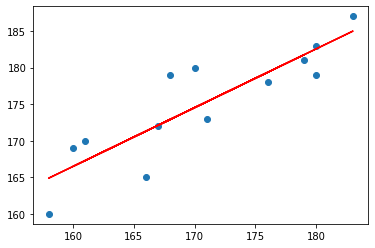

In [ ]:
# 산점도와 회귀직선
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],reg_simp.predict(), 'red')
plt.show()

# 다중 선형 회귀분석
### 결정계수

▣ 문제

Icecream 자료는 1951–03–18에서 1953–07–11까지 4주 단위로 아이스크림 소비를 조사한 자료로 1인당 아이스크림
소비 금액(cons), 주당 평균 가족 소득(income), 아이스크림 판매 가격(price), 평균 기온(temp)이 포함되어 있다.

File: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Icecream.csv
(https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Icecream.csv)

In [ ]:
### CSV 파일에 있는 자료 읽기
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Icecream.csv"
Icecream = pd.read_csv(data_file)
Icecream = Icecream.drop(Icecream.columns[0], axis=1)
Icecream

,cons,income,price,temp
0,0.386,78,0.270,41
1,0.374,79,0.282,56
2,0.393,81,0.277,63
3,0.425,80,0.280,68
4,0.406,76,0.272,69
5,0.344,78,0.262,65
6,0.327,82,0.275,61
7,0.288,79,0.267,47
8,0.269,76,0.265,32
9,0.256,79,0.277,24


In [ ]:
# 변수별 자료 요약
Icecream.describe()

,cons,income,price,temp
count,30.000000,30.00000,30.000000,30.000000
mean,0.359433,84.60000,0.275300,49.100000
std,0.065791,6.24555,0.008342,16.421916
min,0.256000,76.00000,0.260000,24.000000
25%,0.311250,79.25000,0.268500,32.250000
50%,0.351500,83.50000,0.277000,49.500000
75%,0.391250,89.25000,0.281500,63.750000
max,0.548000,96.00000,0.292000,72.000000


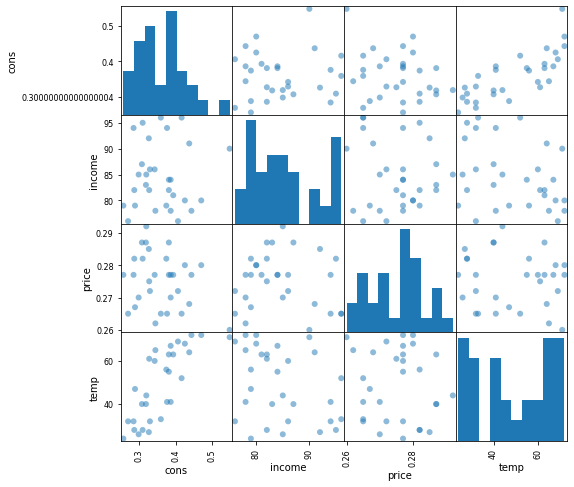

In [ ]:
# 산점도 행렬
p = pd.plotting.scatter_matrix(Icecream, figsize=(8, 8), marker='o')

## ▶ 단순 선형 회귀분석
▣ 아이스크림 소비 금액과 기온과의 회귀모형

In [ ]:
### 단순 선형 회귀분석
# Regression: 소비 금액(cons) ~ 평균 기온(temp)
reg_1 = ols('cons ~ temp', data=Icecream).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     42.28
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.79e-07
Time:                        11:39:49   Log-Likelihood:                 53.383
No. Observations:                  30   AIC:                            -102.8
Df Residuals:                      28   BIC:                            -99.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2069      0.025      8.375      0.000       0.156       0.257
temp           0.0031      0.000      6.502      0.000       0.002       0.004
==============================================================================
Omnibus:                        3.763   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.260
Skew:                           0.577   Prob(JB):                        0.323
Kurtosis:                       3.688   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 기온이 1도 증가하면 소비 금액이 0.0031 증가한다. “P>|t|”는 각 회귀 계수의 검정에 대한 p-value이다. 유의수준 0.05 하에서 temp 변수의 p-value가 유의수준보다 작으므로, 추정된 0.0031은 0이라고 할 수 없다. 결정계수는 0.602이고, 수정결정계수는 0.587이다. 회귀 모형의 적합도 검정에 대한 p-value는 4.79e-07로 유의수준 0.05보다 작으므로, 추정된 회귀직선이 유의하다고 할 수 있다. 따라서 추정된 선형회귀 직선은 cons = 0.0031 * temp + 0.2069이다.

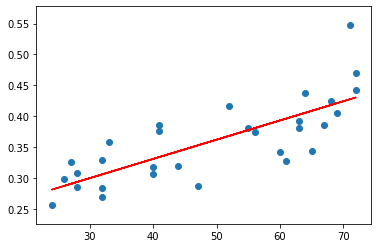

In [ ]:
# 산점도와 회귀직선
plt.scatter(Icecream['temp'],Icecream['cons'])
plt.plot(Icecream['temp'],reg_1.predict(), 'red')
plt.show()

▣ 아이스크림 소비 금액과 수입에 대한 회귀모형

In [ ]:
### 단순 선형 회귀분석
# Regression 2: 소비 금액(cons) ~ 주당 평균 가족 소득(income)
reg_2 = ols('cons ~ income', data=Icecream).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.06449
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.801
Time:                        11:44:18   Log-Likelihood:                 39.613
No. Observations:                  30   AIC:                            -75.23
Df Residuals:                      28   BIC:                            -72.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3167      0.169      1.878      0.071      -0.029       0.662
income         0.0005      0.002      0.254      0.801      -0.004       0.005
==============================================================================
Omnibus:                        4.223   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.877
Skew:                           0.733   Prob(JB):                        0.237
Kurtosis:                       3.387   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 수입에 대한 회귀 계수는 0.0005로, 유의수준 0.05하에서 income 변수의 p-value가 유의수준보다 크기 때문에 추정된 계수는 0이라고 볼 수 있다. 그리고 회귀 모형의 적합도 검정에 대한 p-value도 유의수준보다 크기 때문에 추정된 회귀 직선이 유의하다고 할 수 없다. 즉, 수입이 아이스크림 소비에 영향을 주지 않는다고 볼 수 있다.

## ▶ 다중 선형 회귀분석
▣ Icecream 자료에서 기온과 수입이 아이스크림 소비에 영향을 주는지 다중 선형 회귀분석 모형을 구하여 보자.

In [ ]:
### 다중 선형 회귀분석
# Regression 3: cons ~ temp + income
reg_3 = ols('cons ~ temp + income', data=Icecream).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.81
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.96e-08
Time:                        11:46:41   Log-Likelihood:                 57.742
No. Observations:                  30   AIC:                            -109.5
Df Residuals:                      27   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1132      0.108     -1.045      0.305      -0.335       0.109
temp           0.0035      0.000      7.963      0.000       0.003       0.004
income         0.0035      0.001      3.017      0.006       0.001       0.006
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.094
Skew:                           0.386   Prob(JB):                        0.579
Kurtosis:                       3.528   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 회귀 모형의 적합도 검정의 결과, 유의수준 0.05하에서 p-value가 유의수준보다 작으므로 추정된 회귀 모형이 유의하다고 할 수 있다. 추정된 두 개의 회귀 계수의 검정 결과, 모두 유의수준보다 작으므로 회귀 계수가 0이라고 할 수 없다. 즉 기온과 수입이 아이스크림 소비에 영향을 준다고 할 수 있다. 단순 선형 회귀분석에서 수입은 소비에 영향을 주지 않았지만, 기온과 수입을 사용한 다중 선형 회귀분석에서는 수입이 영향을 준다고 나타났다. 이는 다중 선형 회귀분석으로 기온의 영향이 제거된 수입의 영향을 검정한 결과이다. 수정결정계수는 0.68로 기온만 설명변수로 사용한 단순 선형 회귀모형보다 크다. 추정된 선형회귀 직선은 cons = 0.0035 * temp + 0.0035 * income − 0.1132이다.

▣ Icecream 자료에서 기온과 수입, 아이스크림의 가격이 아이스크림 소비에 영향을 주는지 다중 선형 회귀분석 모형을 구
하여 보자.

In [ ]:
### 다중 선형 회귀분석
# Regression 4: cons ~ temp + income + price
reg_4 = ols('cons ~ temp + income + price', data=Icecream).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.45e-07
Time:                        11:48:40   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.472      -0.358       0.753
temp           0.0035      0.000      7.762      0.000       0.003       0.004
income         0.0033      0.001      2.824      0.009       0.001       0.006
price         -1.0444      0.834     -1.252      0.222      -2.759       0.671
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.047
Skew:                           0.038   Prob(JB):                        0.977
Kurtosis:                       3.179   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 회귀 모형의 적합도 검정의 결과, 유의수준 0.05하에서 p-value가 유의수준보다 크므로 추정된 회귀 모형이 유의하다고 할 수 없다. 추정된 세 개의 회귀 계수의 검정 결과, 가격은 유의수준보다 크므로 회귀 계수가 0이라고 할 수 있다. 즉 기온과 수입이 아이스크림 소비에 영향을 준다고 할 수 있지만 가격은 영향을 준다고 할 수 없다. 단순 선형 회귀분석에서 수입과 가격은 소비에 영향을 주지 않았고, 기온, 수입과 가격을 사용한 다중 선형 회귀분석에서는 가격이 영향을 주지 않는다고 나타났다.